# Import Needed Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data In

## Using Pandas read_csv to bring in the local CSV

In [2]:
book_data = pd.read_csv("best_book_21st.csv")

## Use columns() function to see what columns are included in the data and to see the exact spelling of the column.

In [3]:
book_data.columns

Index(['id', 'title', 'series', 'author', 'book_link', 'genre',
       'date_published', 'publisher', 'num_of_page', 'lang', 'review_count',
       'rating_count', 'rate', 'award'],
      dtype='object')

# Manipulate and Clean Data

## Start by dropping unneeded columns using the drop() function

## Then use the info() function to gather information and see what else is needed to clean the data

In [4]:
alt_book_data = book_data.drop(columns=['id', 'series', 'book_link', 'publisher', 'lang', 'award'])

alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           10018 non-null  object 
 1   author          10003 non-null  object 
 2   genre           9019 non-null   object 
 3   date_published  9970 non-null   object 
 4   num_of_page     9737 non-null   float64
 5   review_count    10003 non-null  object 
 6   rating_count    10003 non-null  object 
 7   rate            10003 non-null  float64
dtypes: float64(2), object(6)
memory usage: 626.2+ KB


## Use value_counts() function to find duplicate titles

In [5]:
alt_book_data['title'].value_counts()

Bloodlines (Bloodlines, #1)                                              4
The Shack                                                                3
The God Delusion                                                         3
Prey                                                                     3
Dominion                                                                 3
                                                                        ..
Shakespeare Saved My Life                                                1
The Power (The Secret, #2)                                               1
Henna House                                                              1
I Remember Running: The Year I Got Everything I Ever Wanted - and ALS    1
The Immortal Hunter (Argeneau #11; Rogue Hunter #2)                      1
Name: title, Length: 9098, dtype: int64

## Use drop_duplicates() function to drop any duplicate titles making sure to keep the first instance of each duplicate so that we don't lose any data

In [6]:
alt_book_data.drop_duplicates(subset='title', keep='first', inplace=True)

## Use isnull().sum() to see the number of missing values in the dataset

In [7]:
alt_book_data.isnull().sum()

title               0
author             15
genre             974
date_published     47
num_of_page       278
review_count       15
rating_count       15
rate               15
dtype: int64

## Use dropna() function to remove the rows that contain null values

In [8]:
alt_book_data.dropna(inplace=True)

## Use split() function to drop the comma and everything after it in the genre column

## Use sample() function to view what data looks like at this point

In [9]:
alt_book_data['genre']=alt_book_data['genre'].str.split(',').str[0]

alt_book_data.sample(10)

title  \
6368    A Year in the Life of William Shakespeare: 1599   
6975       Priestess of the White (Age of the Five, #1)   
7646                Devil's Business (Black London, #4)   
1938     Grave Goods (Mistress of the Art of Death, #3)   
5968                       The Social Conquest of Earth   
9383  Slightly Shady (Lavinia Lake and Tobias March,...   
6949                        What the Day Owes the Night   
7942               Gorgeous (Avery Sisters Trilogy, #2)   
5896         Tricksters (Daughter of the Lioness, #1-2)   
3314                  The Hydrogen Sonata (Culture #10)   

                             author            genre    date_published  \
6368                  James Shapiro          History    June 13th 2006   
6975                  Trudi Canavan          Fantasy  January 1st 2006   
7646              Caitlin Kittredge          Fantasy  August 30th 2011   
1938                Ariana Franklin       Historical    April 1st 2009   
5968               Edward O. Wilson          Science    April 9th 2012   
9383  Amanda Quick,Jayne Ann Krentz          Romance   March 26th 2002   
6949                 Yasmina Khadra          Fiction     May 27th 2010   
7942                    Rachel Vail      Young Adult     May 26th 2009   
5896                  Tamora Pierce          Fantasy        March 2005   
3314                  Iain M. Banks  Science Fiction  October 4th 2012   

      num_of_page review_count rating_count  rate  
6368        333.0          383        3,307  4.09  
6975        688.0          546       16,092  3.87  
7646        336.0           59          654  3.77  
1938        336.0          907       10,955  4.11  
5968        352.0          398        3,722  4.01  
9383        321.0          262        5,278  3.83  
6949        400.0          454        4,704  4.20  
7942        288.0          143        1,793  3.86  
5896        590.0           44        4,509  4.57  
3314        517.0        1,282       22,460  4.17

## Renamed the "rate" colum to "rating" using the rename() function

In [10]:
alt_book_data.rename(columns = {'rate':'rating'}, inplace = True)
alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           7960 non-null   object 
 1   author          7960 non-null   object 
 2   genre           7960 non-null   object 
 3   date_published  7960 non-null   object 
 4   num_of_page     7960 non-null   float64
 5   review_count    7960 non-null   object 
 6   rating_count    7960 non-null   object 
 7   rating          7960 non-null   float64
dtypes: float64(2), object(6)
memory usage: 559.7+ KB


# Analyze Data

## Use mean() function to find the average rating of all the titles

In [11]:
alt_book_data['rating'].mean()

3.9643643216080404

## Use .sum() to find the total number of pages in all of the books combined

In [12]:
alt_book_data['num_of_page'].sum()

2882223.0

## Use .mean() function along with .nlargest() function to show top 5 genres based on ratings as well as show that information on a graph

In [13]:
top_genres = alt_book_data.groupby('genre')['rating'].mean().nlargest(5)

print(top_genres)

genre
Humanities       4.610
Urban            4.509
Inspirational    4.490
Classics         4.340
Labor            4.340
Name: rating, dtype: float64


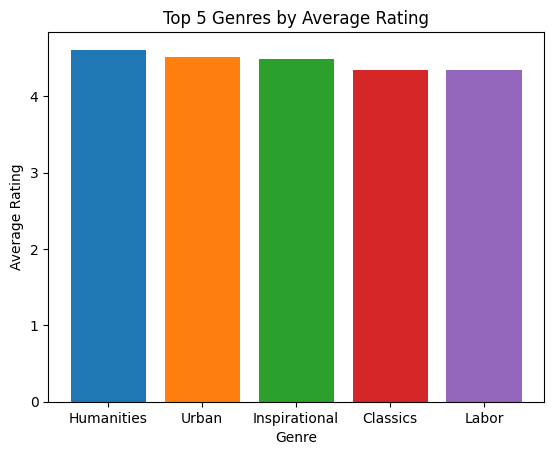

In [14]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(top_genres.index, top_genres.values, color=colors)
plt.title('Top 5 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

## Use .nlargest() to create a new dataframe that shows the 5 titles with the highest number of pages

In [15]:
top_titles = alt_book_data.nlargest(5, 'num_of_page')

print(top_titles[['title', 'num_of_page']])

                                                  title  num_of_page
5490           Harry Potter Boxset (Harry Potter, #1-7)       4167.0
2900  A Song of Ice and Fire (A Song of Ice and Fire...       4081.0
9202  The Dark Tower Series: Books 1-7 (The Dark Tow...       3914.0
7832       Harry Potter Collection (Harry Potter, #1-6)       3342.0
6124  The Collected Joe Abercrombie: The Blade Itsel...       3008.0


## Use .count() function along with .nlargest() function to show the 5 authors with the most titles as well as show that information on a graph

In [16]:
top_authors = alt_book_data.groupby('author')['title'].count().nlargest(5)

print(top_authors)

author
Lynsay Sands        26
Stephen King        21
Kelley Armstrong    20
Lucian Bane         20
Richelle Mead       20
Name: title, dtype: int64


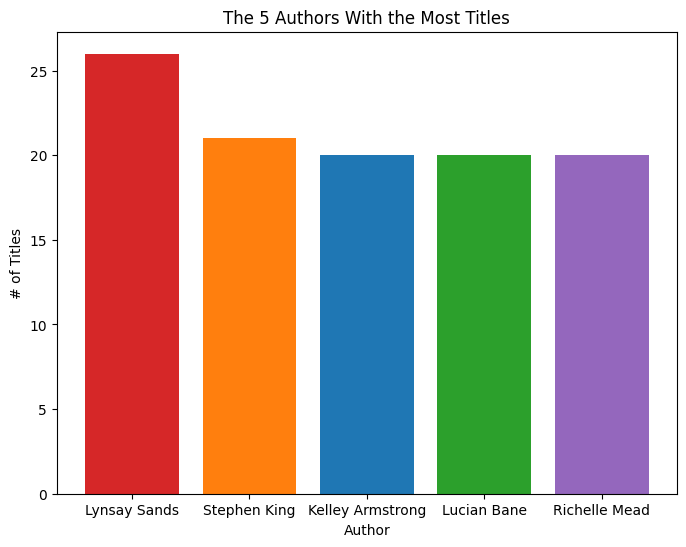

In [17]:
plt.figure(figsize=(8, 6))
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:purple']
plt.bar(top_authors.index, top_authors.values, color=colors)
plt.title('The 5 Authors With the Most Titles')
plt.xlabel('Author')
plt.ylabel('# of Titles')
plt.show()